In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos desde un archivo CSV (ajusta el nombre del archivo y las columnas)
df = pd.read_csv("cleaned_data.csv")
df.head()

,sg,albumin,rbc_level,haemoglobin,wbc_count,outcome,sodium,creatnine
0,0.336943,-0.731127,-1.12601,0.929121,1.646606,1,-1.949433,-0.355527
1,0.352859,-0.731127,0.42871,0.669784,1.646606,0,0.579098,-0.355527
2,0.352859,0.771052,1.98343,-1.664249,0.000000,1,0.507871,0.323924
3,0.321026,0.019963,-1.12601,-0.108227,-0.174980,1,0.418839,-0.355527
4,0.321026,0.771052,0.42871,0.000000,-0.174980,1,0.596904,0.323924


In [3]:
# Definir las características (features) y la variable objetivo
cols = df.columns.tolist()
X = df.drop(columns=['outcome'])  # Excluye la columna 'outcome'
y = df['outcome']

In [4]:
#Cuenta la cantidad de registros por cada clase:

from collections import Counter
Counter(y)

Counter({1: 191, 0: 110})

In [5]:
#Se escalan todos los datos:

escalar = MinMaxScaler()
X_esc = escalar.fit_transform(X)
X_esc

array([[0.9902439 , 0.        , 0.        , ..., 0.66666667, 0.        ,
        0.0625    ],
       [0.99512195, 0.        , 0.5       , ..., 0.66666667, 0.94666667,
        0.0625    ],
       [0.99512195, 0.4       , 1.        , ..., 0.36535304, 0.92      ,
        0.1875    ],
       ...,
       [1.        , 0.        , 0.5       , ..., 0.5       , 0.97333333,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 0.5       , 0.9       ,
        0.        ],
       [0.98536585, 0.4       , 0.        , ..., 0.36535304, 0.        ,
        0.125     ]])

In [6]:
#Separar conjuntos de entrenamiento y de pruebas:

X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.2, random_state = 200)

In [7]:
#Cantidad de registros por cada clase del set de entrenamiento:

Counter(y_train)

Counter({1: 156, 0: 84})

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(75,), 
                    activation='tanh', 
                    solver='adam', 
                    alpha=0.0001, 
                    max_iter=250, 
                    learning_rate="adaptive",
                    random_state=0)

In [9]:
#Entrenamiento:

mlp.fit(X_train, y_train)

c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(75,),
              learning_rate='adaptive', max_iter=250, random_state=0)

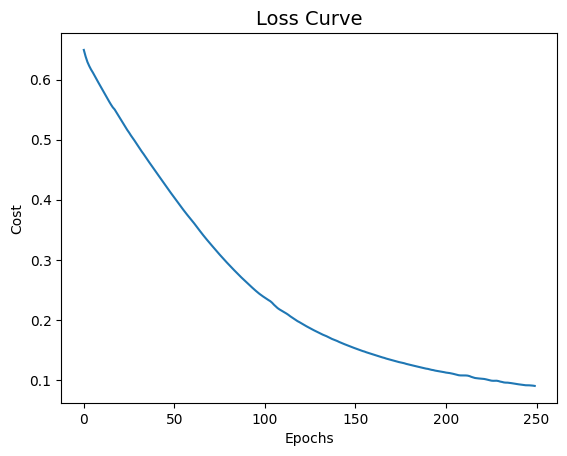

In [10]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [11]:
#Predicciones:

y_pred = mlp.predict(X_test)

df_pred= pd.DataFrame({'Predicción': y_pred, 'Real': y_test})
df_pred.head(10)

,Predicción,Real
166,1,1
246,1,1
127,1,1
276,1,1
121,1,1
203,0,0
47,1,1
284,1,1
73,0,0
176,1,1


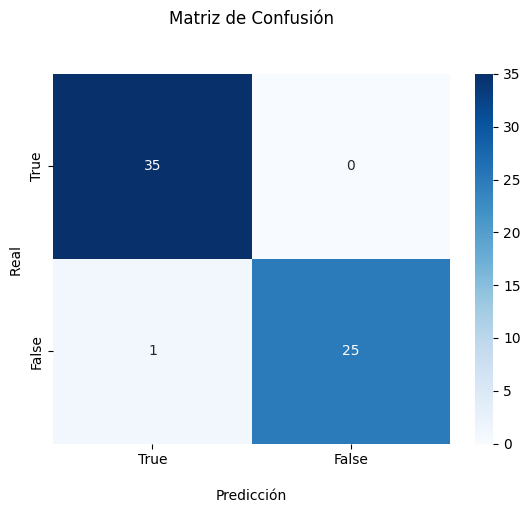

In [12]:
#Matriz de confusión:
def matriz_confusion(y_test,y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns
    #Verifico la matriz de Confusión
    from sklearn.metrics import confusion_matrix
    matriz = confusion_matrix(y_test, y_pred,labels=[1, 0])

    ax = sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Matriz de Confusión\n\n');
    ax.set_xlabel('\nPredicción')
    ax.set_ylabel('Real ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


matriz_confusion(y_test,y_pred)

In [13]:
#Algunas métricas:
def calcula_metricas(nombre_algoritmo,y_test,y_pred):
### CLASE POSITIVA (1) ###
    #Calculo la precisión del modelo
    from sklearn.metrics import precision_score
    precision = precision_score(y_test, y_pred)

    #Calculo la exactitud del modelo
    from sklearn.metrics import accuracy_score
    exactitud = accuracy_score(y_test, y_pred)

    #Calculo la sensibilidad del modelo
    from sklearn.metrics import recall_score
    sensibilidad = recall_score(y_test, y_pred)

    #Calculo el Puntaje F1 del modelo
    from sklearn.metrics import f1_score
    puntajef1 = f1_score(y_test, y_pred)

    #Calculo la curva ROC - AUC del modelo
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test, y_pred)

### CLASE NEGATIVA (0) ###
    from sklearn.metrics import confusion_matrix
    labels = [1, 0]
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    tp,fn,fp,tn = cm.ravel()
    
    #True Negative Rate / specificity
    TNR_recall_espec = round(tn/(tn+fp),6)

    #Negative Predictive Value
    NPV_precision = round(tn/(tn+fn),6)

    #Cálculo del F1 para la clase negativa
    F1_neg = round(2 * (NPV_precision * TNR_recall_espec) / (NPV_precision + TNR_recall_espec),2)

    ## Vector de Desempeño - Resumen de Métricas del Modelo
    df_1 = pd.DataFrame({'Modelo': [nombre_algoritmo],'Clase ':[1],'Exactitud': [exactitud],'Precisión': [precision],
                   'Sensibilidad': [sensibilidad], 'F1': [puntajef1],'AUC': [roc_auc]})
    df_2 = pd.DataFrame({'Modelo': '','Clase ':[0],'Exactitud': '','Precisión': [NPV_precision],
                   'Sensibilidad': [TNR_recall_espec], 'F1': [F1_neg],'AUC': ''})
    
    df_metricas = pd.concat([df_1, df_2], ignore_index=True)

    return df_metricas.style


df_metricas_mlp = calcula_metricas('MLP',y_test,y_pred)
df_metricas_mlp

,Modelo,Clase,Exactitud,Precisión,Sensibilidad,F1,AUC
0,MLP,1,0.983607,0.972222,1.000000,0.985915,0.980769
1,,0,,1.000000,0.961538,0.980000,


In [14]:
# Guardar el modelo:

import pickle

archivo_pkl= 'modelo_mlp_Grupo12.pkl'
pickle.dump(mlp, open(archivo_pkl, 'wb'))

In [15]:
with open('modelo_mlp_Grupo12.pkl', 'rb') as pkl:
    data = pickle.load(pkl)
    print(data)

MLPClassifier(activation='tanh', hidden_layer_sizes=(75,),
              learning_rate='adaptive', max_iter=250, random_state=0)
